In [51]:
import pandas as pd

In [52]:
df = pd.read_csv("http://51.91.120.89/extras/advertising.csv", usecols=["TV","sales"])
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [53]:
X = df.TV.values.reshape(-1,1)
y = df.sales

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [55]:
model = DecisionTreeRegressor(max_depth=6, random_state=0)
model.fit(X, y)

DecisionTreeRegressor(max_depth=6, random_state=0)

0.7805004963055056


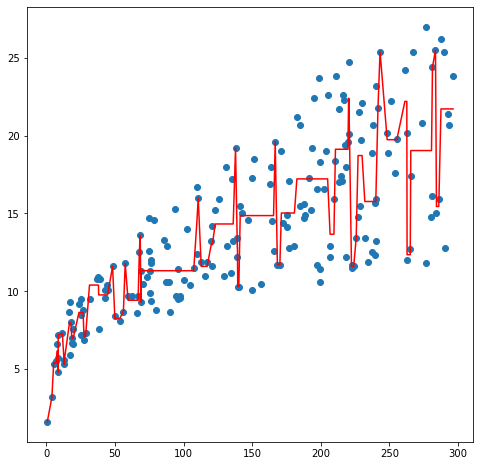

In [56]:
plt.figure(figsize=(8,8))
plt.scatter(X, y)

x = np.unique(X).reshape(-1,1)
y_pred = model.predict(x)

plt.plot(x, y_pred, c="r")
print(r2_score(y, model.predict(X) ))

In [57]:
# Predykcja cen z otomoto.pl
df = pd.read_csv("http://51.91.120.89/extras/otomoto-dt.csv")
df = df[ df.Wersja.str.startswith('B8') ]

In [58]:
df.shape

(1505, 23)

In [59]:
df.columns

Index(['Unnamed: 0', 'ID', 'Cena', 'Rocznik', 'Przebieg', 'Paliwo',
       'Marka pojazdu', 'Model pojazdu', 'Wersja', 'Kategoria', 'Moc',
       'Skrzynia biegów', 'Typ', 'Kolor', 'Perłowy', 'Zarejestrowany w Polsce',
       'Bezwypadkowy', 'Serwisowany w ASO', 'Pierwszy właściciel', 'Metalik',
       'Możliwość finansowania', 'Pojemnosc', 'Wyposażenie'],
      dtype='object')

In [60]:
df.Typ.unique()

array(['Kombi', 'Sedan', 'Kompakt', 'SUV'], dtype=object)

In [61]:
# czyszczenie kolumn
df.drop(columns=['Unnamed: 0','ID','Marka pojazdu', 'Model pojazdu', 'Wersja','Wyposażenie'], inplace=True)

In [62]:
df.sample(n=3, random_state=0)

,Cena,Rocznik,Przebieg,Paliwo,Kategoria,Moc,Skrzynia biegów,Typ,Kolor,Perłowy,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Pierwszy właściciel,Metalik,Możliwość finansowania,Pojemnosc
1440,104900,2019,5.0,Benzyna,Osobowe,150.0,Manualna,Sedan,Czarny,1,0,1,0,0,0,1,1500.0
16,72500,2015,100881.0,Diesel,Osobowe,190.0,"Automatyczna dwusprzęgłowa (DCT, DSG)",Kombi,Szary,0,0,1,1,1,1,1,1968.0
2268,91500,2017,191000.0,Benzyna,Osobowe,280.0,"Automatyczna dwusprzęgłowa (DCT, DSG)",Sedan,Czarny,0,1,1,1,1,1,0,1984.0


In [63]:
df.dtypes

Cena                         int64
Rocznik                      int64
Przebieg                   float64
Paliwo                      object
Kategoria                   object
Moc                        float64
Skrzynia biegów             object
Typ                         object
Kolor                       object
Perłowy                      int64
Zarejestrowany w Polsce      int64
Bezwypadkowy                 int64
Serwisowany w ASO            int64
Pierwszy właściciel          int64
Metalik                      int64
Możliwość finansowania       int64
Pojemnosc                  float64
dtype: object

In [64]:
df["Skrzynia biegów"].unique()

array(['Automatyczna dwusprzęgłowa (DCT, DSG)', 'Manualna',
       'Automatyczna hydrauliczna (klasyczna)',
       'Półautomatyczna (ASG, Tiptronic)',
       'Automatyczna bezstopniowa (CVT)'], dtype=object)

In [65]:
df.Kolor.value_counts()

Czarny        440
Szary         290
Srebrny       251
Biały         175
Niebieski     128
Brązowy        92
Inny kolor     68
Złoty          36
Bordowy        11
Beżowy         10
Czerwony        3
Zielony         1
Name: Kolor, dtype: int64

In [66]:
df = pd.get_dummies(df)

In [67]:
df.columns

Index(['Cena', 'Rocznik', 'Przebieg', 'Moc', 'Perłowy',
       'Zarejestrowany w Polsce', 'Bezwypadkowy', 'Serwisowany w ASO',
       'Pierwszy właściciel', 'Metalik', 'Możliwość finansowania', 'Pojemnosc',
       'Paliwo_Benzyna', 'Paliwo_Diesel', 'Kategoria_Osobowe',
       'Skrzynia biegów_Automatyczna bezstopniowa (CVT)',
       'Skrzynia biegów_Automatyczna dwusprzęgłowa (DCT, DSG)',
       'Skrzynia biegów_Automatyczna hydrauliczna (klasyczna)',
       'Skrzynia biegów_Manualna',
       'Skrzynia biegów_Półautomatyczna (ASG, Tiptronic)', 'Typ_Kombi',
       'Typ_Kompakt', 'Typ_SUV', 'Typ_Sedan', 'Kolor_Beżowy', 'Kolor_Biały',
       'Kolor_Bordowy', 'Kolor_Brązowy', 'Kolor_Czarny', 'Kolor_Czerwony',
       'Kolor_Inny kolor', 'Kolor_Niebieski', 'Kolor_Srebrny', 'Kolor_Szary',
       'Kolor_Zielony', 'Kolor_Złoty'],
      dtype='object')

In [68]:
import seaborn as sns

<AxesSubplot:xlabel='Cena', ylabel='Count'>

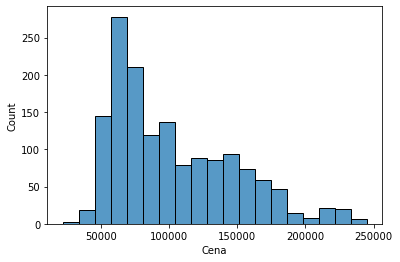

In [69]:
sns.histplot(df.Cena)

/Users/marian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


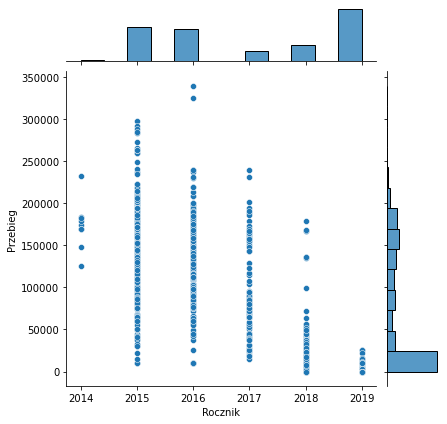

In [70]:
sns.jointplot(df.Rocznik, df.Przebieg)

/Users/marian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


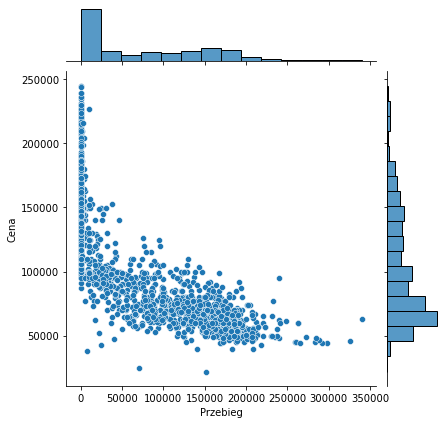

In [71]:
sns.jointplot(df.Przebieg, df.Cena)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = df.iloc[: , 1:]
y = df.Cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(2,16):
    model = RandomForestRegressor(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    print(f"DT={i}, score={model.score(X_test, y_test)}")

DT=2, score=0.8398475179576292
DT=3, score=0.901257948541311
DT=4, score=0.9276200961057421
DT=5, score=0.9336646209111118
DT=6, score=0.9344299140578397
DT=7, score=0.9360332527947067
DT=8, score=0.9356506956153579
DT=9, score=0.9346014864241781
DT=10, score=0.9332803505810027
DT=11, score=0.9325876134283262
DT=12, score=0.9317555762502667
DT=13, score=0.9310232656005564
DT=14, score=0.930854820299579
DT=15, score=0.9314699392570638


In [74]:
X = df.iloc[: , 1:]
y = df.Cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
for i in range(2,16):
    model = DecisionTreeRegressor(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    print(f"DT={i}, score={model.score(X_test, y_test)}")

DT=2, score=0.7913522719184465
DT=3, score=0.8697414947918567
DT=4, score=0.9145249913857951
DT=5, score=0.9173430759251754
DT=6, score=0.9166699366617795
DT=7, score=0.9126658265999572
DT=8, score=0.9101279000256046
DT=9, score=0.90606311822552
DT=10, score=0.9020525428383067
DT=11, score=0.8863490062362863
DT=12, score=0.8918519096025583
DT=13, score=0.8764650706437558
DT=14, score=0.8848018599103535
DT=15, score=0.8771680937639931


In [76]:
i = 6
model = DecisionTreeRegressor(max_depth=i, random_state=0)
model.fit(X_train, y_train)
print(f"DT={i}, score={model.score(X_test, y_test)}")

DT=6, score=0.9166699366617795


In [77]:
pd.DataFrame( model.feature_importances_, index=X.columns ).sort_values(0, ascending=False).head(10)

,0
Rocznik,0.728052
Moc,0.167986
Przebieg,0.061531
Skrzynia biegów_Manualna,0.013633
Paliwo_Diesel,0.011873
Pojemnosc,0.006750
Kolor_Niebieski,0.002616
Kolor_Srebrny,0.002484
Typ_Sedan,0.002039
Zarejestrowany w Polsce,0.000926


<AxesSubplot:xlabel='Cena', ylabel='Count'>

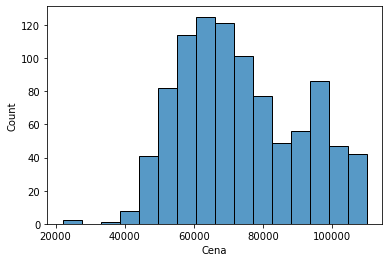

In [78]:
# ograniczenie ceny samochodu do 110tys
df = df.query( " Cena<110_000 ")
sns.histplot(df.Cena)

In [79]:
X = df.iloc[: , 1:]
y = df.Cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(2,16):
    model = DecisionTreeRegressor(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    print(f"DT={i}, score={model.score(X_test, y_test)}")

DT=2, score=0.5674677404003734
DT=3, score=0.622994077584009
DT=4, score=0.6734077553178417
DT=5, score=0.6652336022460208
DT=6, score=0.6233506740530164
DT=7, score=0.6183614689000878
DT=8, score=0.5229492951192429
DT=9, score=0.5139396667615824
DT=10, score=0.44737792544625565
DT=11, score=0.45067404098862485
DT=12, score=0.4341495729807159
DT=13, score=0.4077107514698438
DT=14, score=0.38989021866456974
DT=15, score=0.4521095406246366


/Users/marian/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


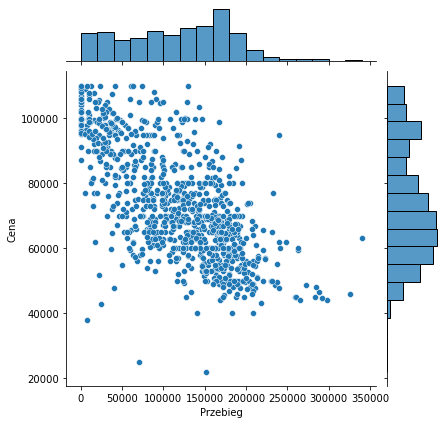

In [80]:
sns.jointplot(df.Przebieg, df.Cena)

In [81]:
X = df.iloc[: , 1:]
y = df.Cena

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(2,16):
    model = RandomForestRegressor(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    print(f"DT={i}, score={model.score(X_test, y_test)}")

DT=2, score=0.5922579916591237
DT=3, score=0.689510312138534
DT=4, score=0.7274384315369139
DT=5, score=0.7414129818810253
DT=6, score=0.7459698018827292
DT=7, score=0.7407287828798161
DT=8, score=0.7427343974563958
DT=9, score=0.739782328668114
DT=10, score=0.7374046840311718
DT=11, score=0.7327321189693106
DT=12, score=0.7337268187665125
DT=13, score=0.7350107388732354
DT=14, score=0.7331607742946977
DT=15, score=0.7330129117648527
